# **ANTECENDENTES** (Entrada)

Superficie: qual o nivel de dificuldade da superficie, em uma escala de 0 a 5

    * Facil, Moderada, Dificil

  Sujeira: Qual a quantidade de sujeira, em uma escala de 0 a 5

    * Leve, Moderada, Pesada

# **CONSEQUENTE** (Saida)

Sucção: Qual o nivel de sucção que o aspirador de pó deve ser configurado, entre 0% e 10%

    * Baixo, Medio, Alto

# **REGRAS**

  * Se a superficie for facil e a sujeira for leve, então, a sucção será baixa

  * Se a superficie for moderada e a sujeira for leve, então, a sucção será média

  * Se a superficie for difícil ou a sujeira for pesada, então, a sucção será alta

  * Se a superficie for moderada então, a sucção será média

INSTALAÇÃO E IMPORTAÇÃO DAS BIBLIOTECAS
    
    * Documentação: https://pythonhosted.org/scikit-fuzzy/overview.html



In [56]:
!pip install scikit-fuzzy

In [57]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

# **ANTECEDENTES E CONSEQUENTE**

In [58]:
#Range representando a escala de 0 ah 5
np.arange(0,6,1)

array([0, 1, 2, 3, 4, 5])

In [59]:
superficie = ctrl.Antecedent(np.arange(0,6,1), 'superficie')
sujeira = ctrl.Antecedent(np.arange(0, 6, 1), 'sujeira')

In [60]:
superficie.universe # posso verificar o arange que será percorrido, nesse caso um Array de 5 possições!!!

array([0, 1, 2, 3, 4, 5])

In [61]:
succao = ctrl.Consequent(np.arange(0,11,1), 'succao')
succao.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## **MEMBERSHIP FUNÇÃO DE PERTINENCIA!**

In [62]:
superficie.automf(number = 3, names = ['facil', 'moderada', 'dificil'])
sujeira.automf(number = 3, names = ['leve', 'moderada', 'pesada'])

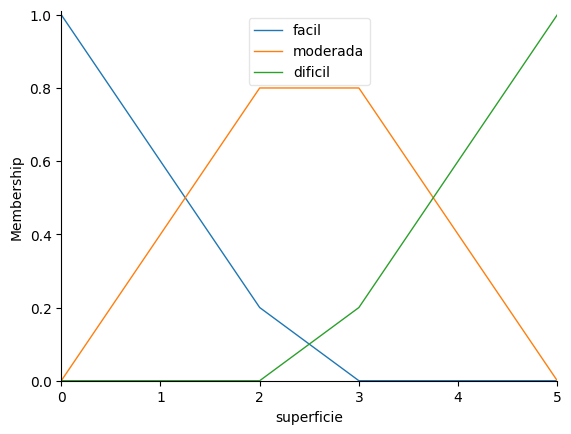

In [63]:
superficie.view()

#OBS: MEMBERSHIO SERIA O GRAU DE PERTINENCIA DE NOSSOS DADOS!!

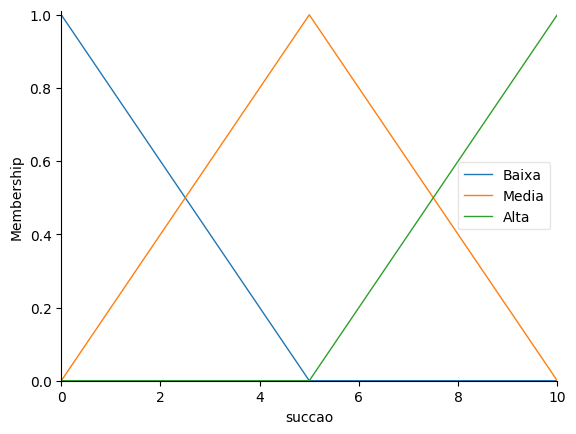

In [64]:
succao['Baixa'] = fuzzy.trimf(succao.universe, [0, 0, 5])
succao['Media'] = fuzzy.trimf(succao.universe, [0, 5, 10])
succao['Alta'] = fuzzy.trimf(succao.universe, [5, 10, 10])
succao.view()


 ***CRIANDO AS DEFINIÇÕES DAS REGRAS PARA NOSSA ANALISE!***

In [66]:
regra1 = ctrl.Rule(superficie['facil'] & sujeira['leve'], succao['Baixa'])
regra2 = ctrl.Rule(superficie['moderada'] & sujeira['leve'], succao['Media'])
regra3 = ctrl.Rule(superficie['dificil'] | sujeira['pesada'], succao['Alta'])
regra4 = ctrl.Rule(superficie['moderada'], succao['Media'])

SISTEMA DE CONTROLE = USADO PARA LIGAR AS VARIAVEIS INTEIRAS COM AS VARIAVEIS CATEGORICAS

In [69]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4])
sistema = ctrl.ControlSystemSimulation(sistema_controle)#utilizada para fazer as simulaçoes

4.121951219512195


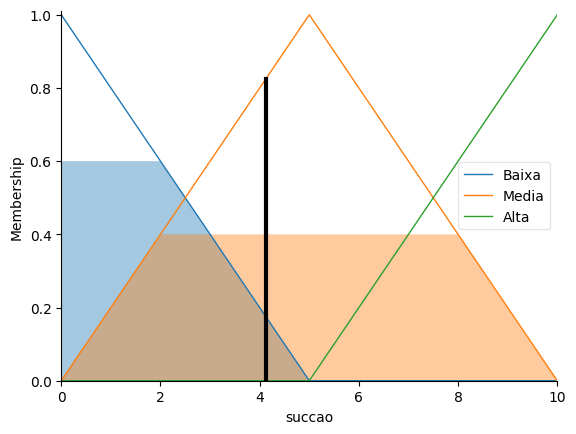

In [73]:
sistema.input['superficie'] = 1
sistema.input['sujeira'] = 0.5
sistema.compute()
print(sistema.output['succao'])
succao.view(sim = sistema)

OUTRAS FUNÇÕES PARA ANALISE

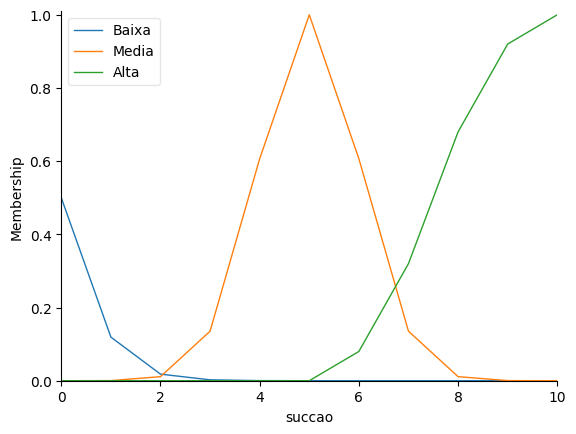

In [77]:
succao['Baixa'] = fuzzy.sigmf(succao.universe, 0, -2)
succao['Media'] = fuzzy.gaussmf(succao.universe, 5, 1)
succao['Alta'] = fuzzy.pimf(succao.universe, 5, 10, 10, 11)
succao.view()